<a href="https://colab.research.google.com/github/riddhigarg2605/RBC/blob/main/Elongated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow import keras

In [4]:
pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
     |████████████████████████████████| 4.0 MB 47.8 MB/s 
     |████████████████████████████████| 462 kB 39.8 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [3]:
!unzip '/content/rbc_augmentedNKT.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rbc_augmentedNKT/training/elongated/Ovalocyte_original_0238MarionsHereditaryElliptocytosis1-Gloria-Kwon4.jpg_c71b1702-045c-413d-adaf-42a379ed73a2.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._Ovalocyte_original_0238MarionsHereditaryElliptocytosis1-Gloria-Kwon4.jpg_c71b1702-045c-413d-adaf-42a379ed73a2.jpg  
  inflating: rbc_augmentedNKT/training/elongated/elong_original_e0034.jpg_13f94a8f-8146-4815-a682-eceb27bc48ba.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._elong_original_e0034.jpg_13f94a8f-8146-4815-a682-eceb27bc48ba.jpg  
  inflating: rbc_augmentedNKT/training/elongated/Ovalocyte_original_602701.jpg_2a3a359d-4755-47ba-bc9f-6c120948be17.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._Ovalocyte_original_602701.jpg_2a3a359d-4755-47ba-bc9f-6c120948be17.jpg  
  inflating: rbc_augmentedNKT/training/elongated/Elliptocytosis_original_602706.jpg_f0554da8-0f6e-462f-95e0-

In [4]:
img_width = 150
img_height = 150

train_data_dir = '/content/rbc_augmentedNKT/training'
validation_data_dir = '/content/rbc_augmentedNKT/validation'
train_samples = 3237
validation_samples = 238
epochs = 90
batch_size = 20

#Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [9]:
import inspect
from tensorflow.keras.optimizers import Adam

In [10]:
#import keras
#from keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=.0005), 
              metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3237 images belonging to 3 classes.


In [14]:
print(train_generator.class_indices)

{'circular': 0, 'elongated': 1, 'other': 2}


In [15]:
imgs, labels = next(train_generator)

In [16]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
[0. 0. 1.]


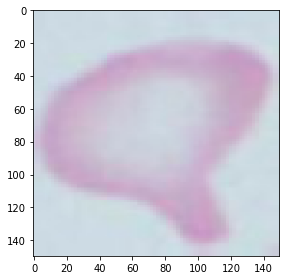

[0. 1. 0.]


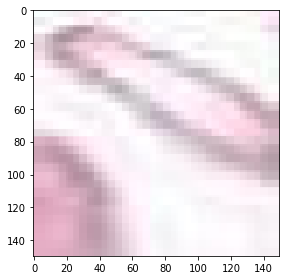

[1. 0. 0.]


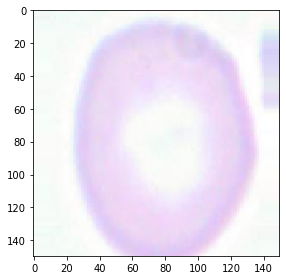

[0. 1. 0.]


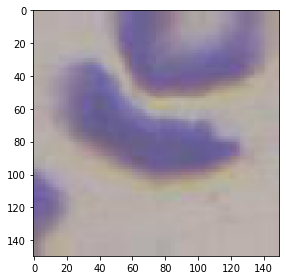

[0. 1. 0.]


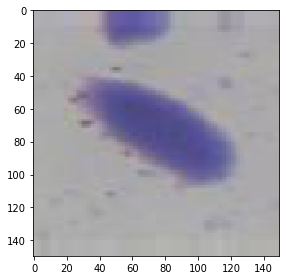

[1. 0. 0.]


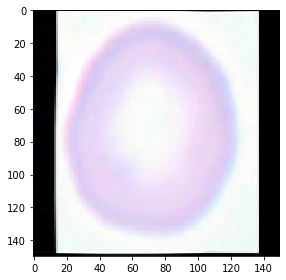

[1. 0. 0.]


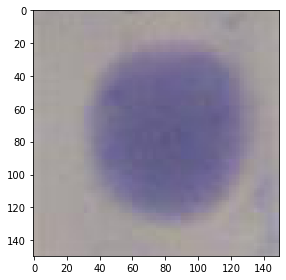

[1. 0. 0.]


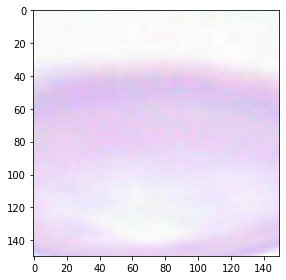

[1. 0. 0.]


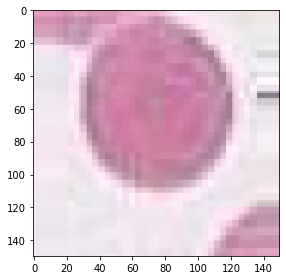

[1. 0. 0.]


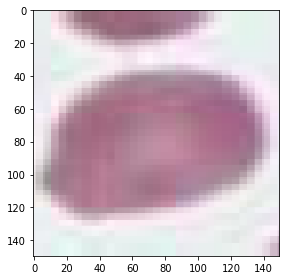

[1. 0. 0.]


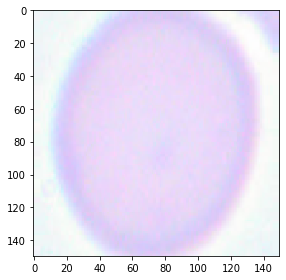

[1. 0. 0.]


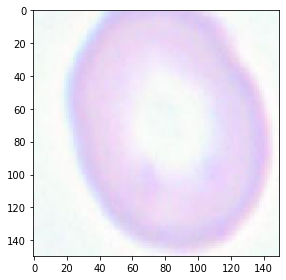

[1. 0. 0.]


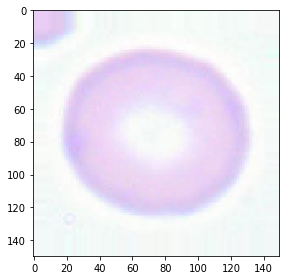

[1. 0. 0.]


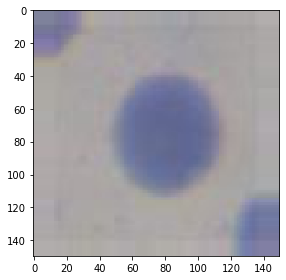

[1. 0. 0.]


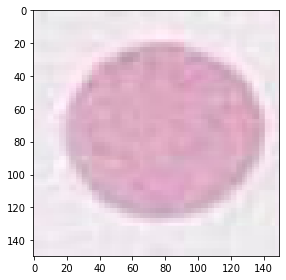

[1. 0. 0.]


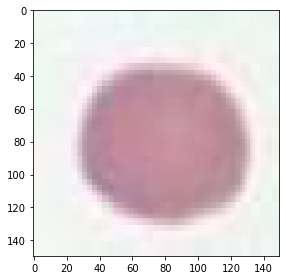

[1. 0. 0.]


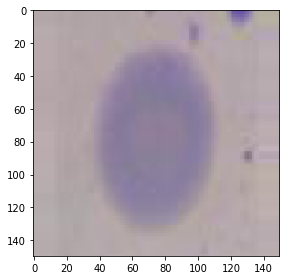

[1. 0. 0.]


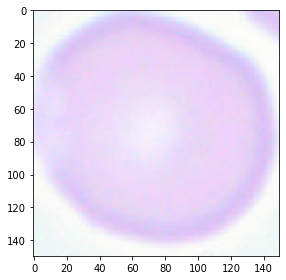

[0. 1. 0.]


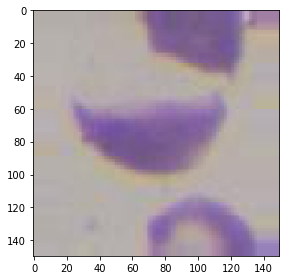

[0. 0. 1.]


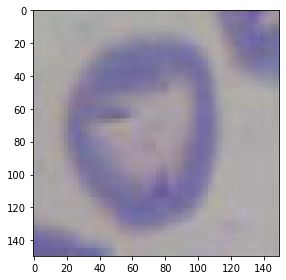

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [18]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 238 images belonging to 3 classes.


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/90
161/161 [==============================] - 113s 697ms/step - loss: 1.0619 - accuracy: 0.4050 - val_loss: 1.0197 - val_accuracy: 0.5773
Epoch 2/90
161/161 [==============================] - 111s 690ms/step - loss: 0.8536 - accuracy: 0.6012 - val_loss: 0.9339 - val_accuracy: 0.4500
Epoch 3/90
161/161 [==============================] - 111s 690ms/step - loss: 0.7119 - accuracy: 0.6851 - val_loss: 0.7332 - val_accuracy: 0.6045
Epoch 4/90
161/161 [==============================] - 111s 689ms/step - loss: 0.6267 - accuracy: 0.7317 - val_loss: 0.8500 - val_accuracy: 0.6409
Epoch 5/90
161/161 [==============================] - 110s 683ms/step - loss: 0.5843 - accuracy: 0.7460 - val_loss: 0.8196 - val_accuracy: 0.6273
Epoch 6/90
161/161 [==============================] - 114s 705ms/step - loss: 0.5700 - accuracy: 0.7634 - val_loss: 0.8179 - val_accuracy: 0.6045
Epoch 7/90
161/161 [==============================] - 110s 684ms/step - loss: 0.5383 - accuracy: 0.7706 - val_loss: 0.6418 -

In [20]:
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

0.9359651803970337

In [21]:
z = history.history['accuracy'][-1]

In [22]:
print('accuracy obtained =',z*100)

accuracy obtained = 93.22350025177002


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


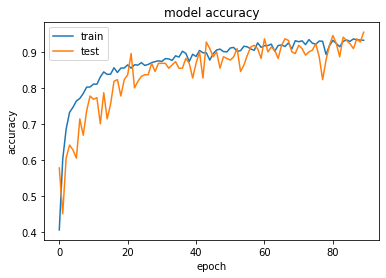

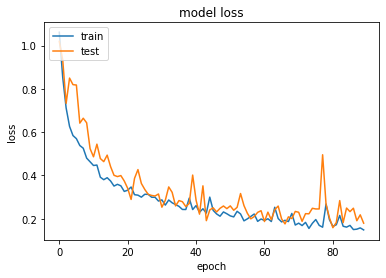

In [24]:
# list all data in history
print(history.history.keys())
# summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
import io
import requests
from PIL import Image

In [36]:
predict_dir_path='/content/rbc_augmentedNKT/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['.DS_Store', '15073012382_48e606d24b_c2.jpg', 'normal_test_5.jpg', '602705Elip.jpg', 'ech_test_1.jpg', 'tear_test_5.jpg', 'testc0200.jpg', '2611844781.jpg', '15073012382_48e606d24b_c3.jpg', 'testo0221.jpg', '2611844783.jpg', '602706.jpg', 'Sickle cell_original_Sickle_Cell_Blood_Smear2.jpg_c70ee2a8-79f1-4268-8392-37213b7ee216.jpg', 'ech_test_3.jpg', 'teste0226.jpg', 'testc0201.jpg', '03-SCI-GLOBAL-articleLarge5.jpg', 'cropped_blood_cells_original_26.jpg_b1087322-31d0-46f4-8cc6-0afe40ad9952.jpg', 'teste0227.jpg', 'tear_test_1.jpg', 'tear_test_3.jpg', 'cropped_blood_cells_original_12.jpg_192d60d8-691d-434d-ad78-ee7654050306.jpg', 'ech_test_5.jpg', 'cropped_blood_cells_original_11.jpg_817822d1-c6f2-446b-bd59-fbeb1fb74af0.jpg', 'ech_test_2.jpg', 'ellip_test_3.jpg', 'testc0202.jpg', '603086.jpg', 'testo0223.jpg', '98381692.jpg', 'tear_test_2.jpg', '602708 1.03.54 AM.jpg', '602701oval.jpg', '4.jpg', '602701.jpg', 'testc0198.jpg', 'testo0224.jpg', 'testo0222.jpg', 'ellip_test_5.jpg', 'Sickle 